<a href="https://colab.research.google.com/github/neko88/Machine-Learning/blob/main/Scikit_Practice_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SciKit Learn practice referring to https://www.w3resource.com/machine-learning/scikit-learn/iris/index.php

# Iris Dataset
The dataset consists of 50 samples from each of 3 species of Iris:

* Setosa
* Virginica
* Versicolor

Four features measured from each sample:
* Length of Sepal
* Width of Sepal
* Length of Petal
* Width of Petal

Build a model that can distinguish the species of Iris from each other.

# Prepare the Data

In [1]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from scipy import sparse
import seaborn as sns

In [2]:
# Load the Data
iris_ds = datasets.load_iris()

# View Info of the Data

In [3]:
# Converting to Pandas Dataframe
df = pd.DataFrame(data=iris_ds.data, columns=iris_ds.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## **Creating Labels for the Data Set**

In [4]:

# Name, Sepal Length, Sepal Width, Petal Length, Petal Width
# List creates 3 rows, 5 columns each
data_labels =[
    ['Setosa']*5,
    ['Versicolor']*5,
     ['Virginica']*5
    ]

df_labels = pd.DataFrame(data_labels)

# Repeat labels for more rows
df_labels = pd.DataFrame(np.repeat(data_labels, 50, axis=0))
print(df_labels)

             0          1          2          3          4
0       Setosa     Setosa     Setosa     Setosa     Setosa
1       Setosa     Setosa     Setosa     Setosa     Setosa
2       Setosa     Setosa     Setosa     Setosa     Setosa
3       Setosa     Setosa     Setosa     Setosa     Setosa
4       Setosa     Setosa     Setosa     Setosa     Setosa
..         ...        ...        ...        ...        ...
145  Virginica  Virginica  Virginica  Virginica  Virginica
146  Virginica  Virginica  Virginica  Virginica  Virginica
147  Virginica  Virginica  Virginica  Virginica  Virginica
148  Virginica  Virginica  Virginica  Virginica  Virginica
149  Virginica  Virginica  Virginica  Virginica  Virginica

[150 rows x 5 columns]


## Data keys, number rows and columns, description of the data

In [5]:
# Print keys, num rows & cols, feature names and desc of the data
print("Feature Names: \n", df.keys())
print("\nShape of Data: \n", df.shape)
print("\nData Info: ")
# Print num. observations, missing values, and NaNs
print(df.info())

Feature Names: 
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Shape of Data: 
 (150, 4)

Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [6]:
# Convert Data to 2D Array and SciPy Sparse Matrix
iM_4 = np.eye(4)
print("NumPy Array:\n", iM_4)
sparse_matrix = sparse.csr_matrix(iM_4)
print ("SciPy CSR Matrix:\n", sparse_matrix)

NumPy Array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
SciPy CSR Matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


## Percentiles, Mean, STD

In [7]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


# Visualizing the Data

## Plot: Statistics

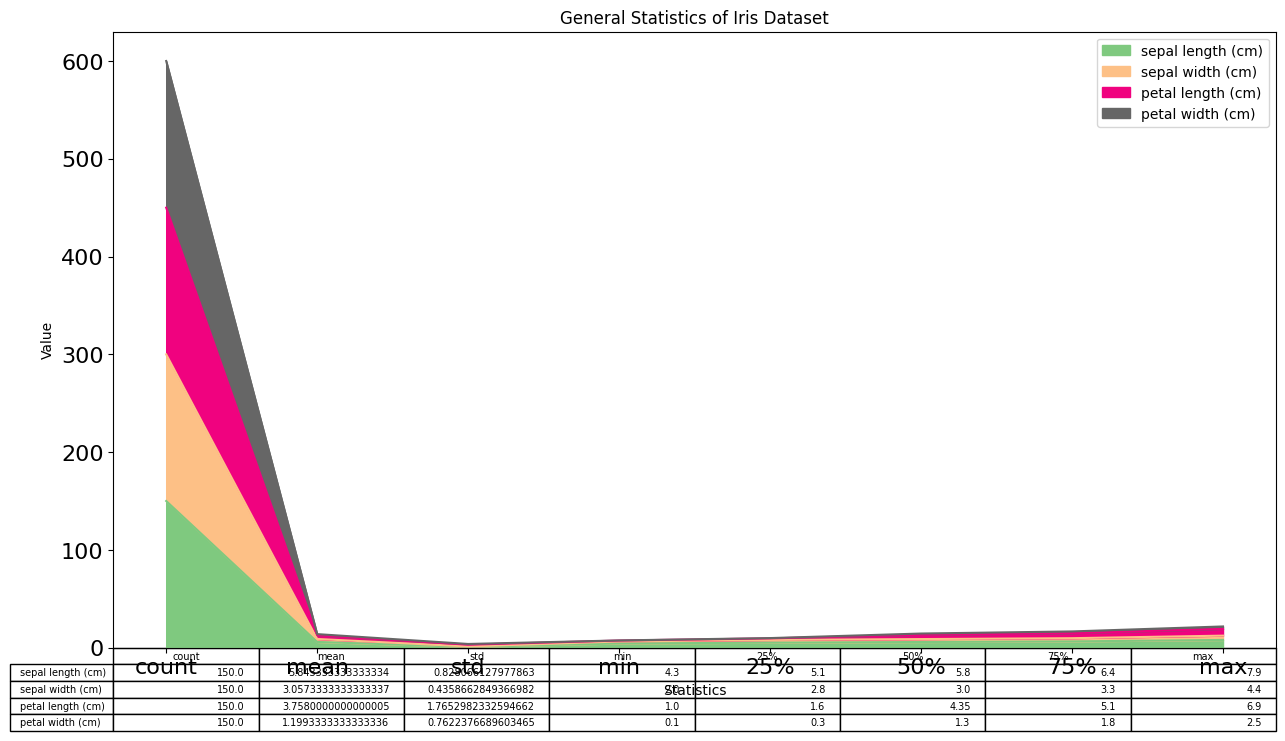

In [8]:
df.describe().plot(kind='area',
                   fontsize=16, 
                   figsize=(15,8), 
                   table=True, 
                   colormap='Accent')
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('General Statistics of Iris Dataset')
plt.show()

## Plot: Bar Chart of Frequency

In [9]:
# Note: .csv import
""" 
ax = plt.subplots(1,1,figsize=(10,8))
# sns.countplot('Species', data=df)
# plt.title('Iris Species Count')
# plt.show()
"""

" \nax = plt.subplots(1,1,figsize=(10,8))\n# sns.countplot('Species', data=df)\n# plt.title('Iris Species Count')\n# plt.show()\n"

## Plot: Pie Chart of Frequency

## Plot: Scatterplot Relationship between Features

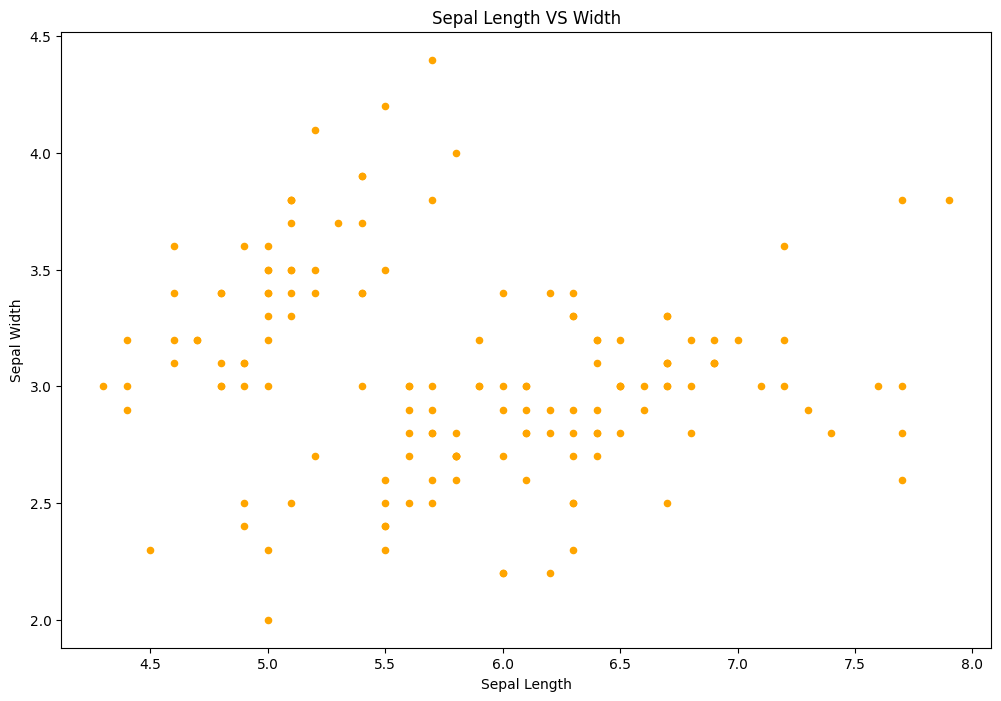

In [10]:
fig = df.plot(kind='scatter',
                                        x=df.keys()[0], 
                                        y=df.keys()[1], 
                                        color='orange')

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

## Plot: Bar Graph of Feature Distribution

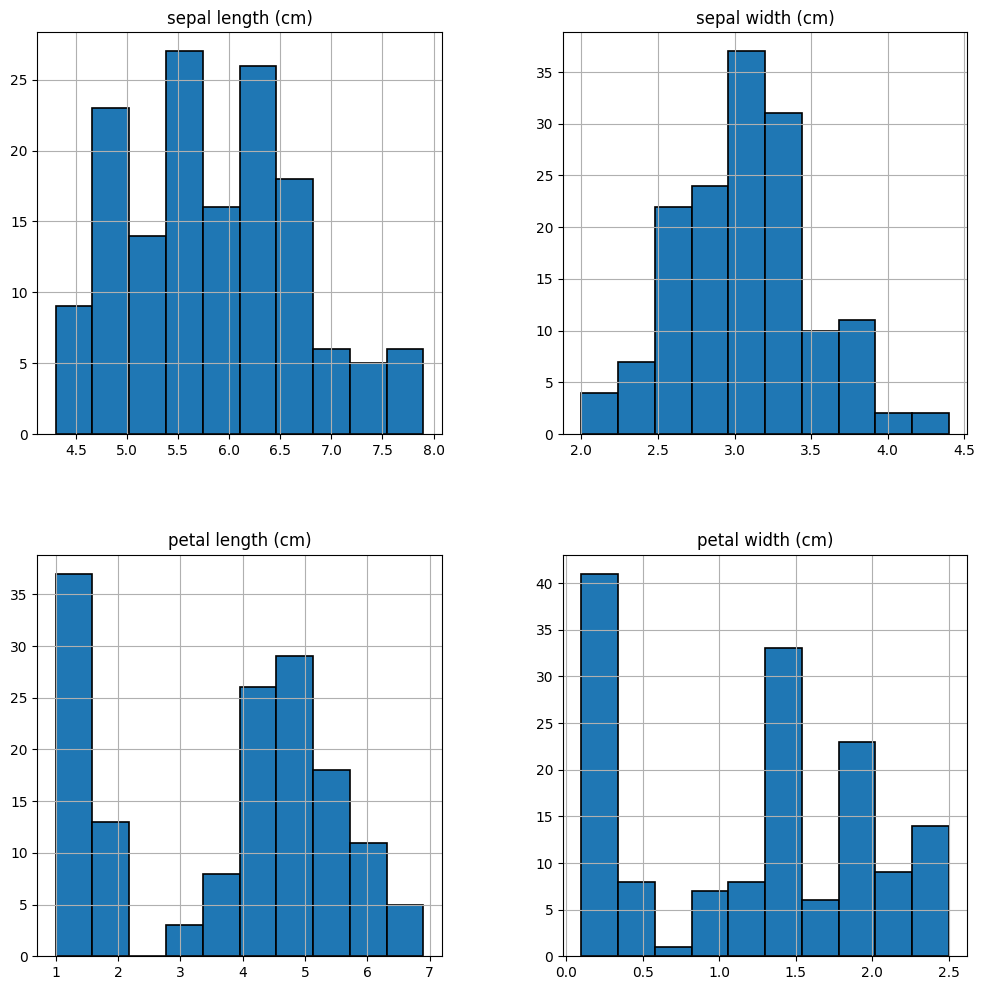

In [11]:
# Distribution of how the Sepal Length & Width, and Petal Length & Width are distributed
df.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

# K-Nearest Neighbors Algorithm in Iris

k-NN is a non-parametric method used for classification and regression. 

Input consists of 'k' closest training examples in the feature space.

Output depends on whether k-NN is used for classifcation or regression.

k-NN CLASSIFICATION:


*   output class is a membership
*   object is classified by a plurality vote of its neighbours
* the object is assigned to the class most common among its k-nearest neighbours
* if k=1 then the object is simply assigned to the class of that **single** nearest neighbour.

k-nearest-neighbors-algorithm.svg

Test sample green dot is to be assigned to either the blue squares or red triangles.
if k = 3 (3 nearest neighbours) then the sample is classified as the red triangles (2 v 1)
if k = 5 (5 nearest neighbours) then the sample is classified as a blue square (5 v 2)


## Split the Dataset to X and y

Split the dataset into:
* X - attributes
* y - labels

The X attributes are sepal width and length, and petal width and length.

In [12]:
# Select all (4 attribute values per row(sample))
X = df.iloc[:,:].values
# Select all (4 labels per row(sample))
y = df_labels.iloc[:,:].values
print("Attributes:")
print(X)
print("Labels:")
print(y)

Attributes:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]


## Split the Data into Train and Test Data
Split the dataset into 70% training data and 30% test data.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [14]:
print("first 10 samples of the 70% train data:")
for i in range(10):
  print(y_train[i][0], X_train[i])

first 10 samples of the 70% train data:
Setosa [4.4 2.9 1.4 0.2]
Virginica [7.2 3.2 6.  1.8]
Versicolor [6.2 2.2 4.5 1.5]
Setosa [5.1 3.7 1.5 0.4]
Versicolor [5.  2.3 3.3 1. ]
Setosa [5.  3.6 1.4 0.2]
Virginica [7.7 2.8 6.7 2. ]
Setosa [4.6 3.2 1.4 0.2]
Versicolor [5.9 3.  4.2 1.5]
Setosa [5.1 3.3 1.7 0.5]


In [15]:
print("first 10 samples of the 30% test data:")
for i in range(10):
  print(y_test[i][0], X_test[i])

first 10 samples of the 30% test data:
Virginica [6.5 3.  5.5 1.8]
Virginica [6.2 2.8 4.8 1.8]
Versicolor [5.7 2.8 4.1 1.3]
Virginica [5.8 2.7 5.1 1.9]
Setosa [5.1 3.4 1.5 0.2]
Virginica [6.1 2.6 5.6 1.4]
Virginica [6.7 3.3 5.7 2.1]
Setosa [4.8 3.  1.4 0.1]
Setosa [5.1 3.5 1.4 0.2]
Versicolor [6.5 2.8 4.6 1.5]


## Convert String Labels into Numerical Labels

In [36]:
# Convert String Labels to Numbers.
data_labels_2D = [['Setosa'],['Versicolor'],['Virginica']]
data_labels_2D = [[data_labels[0][0]],[data_labels[1][0]],[data_labels[2][0]]]
data_labels_1D = []
for row in data_labels_2D:
  for val in row:
    data_labels_1D.append(val)

print(data_labels_1D)


['Setosa', 'Versicolor', 'Virginica']


In [39]:
# For importing label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Transform string labels into numbers
data_labels_num = label_encoder.fit_transform(data_labels_1D)
print(data_labels_num)

[0 1 2]
